In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.gridspec as gridspec

try:
  from einops import rearrange
except:
  %pip install einops
  from einops import rearrange

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 578.6 kB/s eta 0:00:00


In [2]:
if os.path.exists('sea_turtle.jpg'):
    print('sea_turtle.jpg exists')
else:
    !wget 'https://t4.ftcdn.net/jpg/05/59/31/69/360_F_559316959_jOlDbd6M5BTg510c552Xlp6XpsVNJWwD.jpg' -O sea_turtle.jpg

--2024-09-19 20:19:17--  https://t4.ftcdn.net/jpg/05/59/31/69/360_F_559316959_jOlDbd6M5BTg510c552Xlp6XpsVNJWwD.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67231 (66K) [image/jpeg]
Saving to: ‘sea_turtle.jpg’

sea_turtle.jpg      100%[===================>]  65.66K  --.-KB/s    in 0.02s   

2024-09-19 20:19:17 (2.80 MB/s) - ‘sea_turtle.jpg’ saved [67231/67231]



In [3]:
image=torchvision.io.read_image('sea_turtle.jpg')

In [4]:
image.shape
print(image)

tensor([[[ 11,  11,  13,  ...,  69,  61,  53],
         [ 13,  13,  12,  ...,  67,  66,  63],
         [ 13,  12,  11,  ...,  85,  86,  84],
         ...,
         [  8,   6,   4,  ...,   5,   7,   8],
         [  6,   6,   5,  ...,   0,   1,   3],
         [  8,   7,   7,  ...,  12,  13,  14]],

        [[ 53,  53,  53,  ..., 111, 103,  91],
         [ 55,  55,  54,  ..., 105, 104,  99],
         [ 55,  54,  53,  ..., 122, 122, 120],
         ...,
         [ 27,  25,  21,  ...,  14,  16,  18],
         [ 25,  23,  21,  ...,   7,   8,  10],
         [ 27,  26,  24,  ...,  17,  18,  19]],

        [[ 65,  65,  65,  ..., 127, 119, 110],
         [ 67,  67,  66,  ..., 118, 117, 115],
         [ 67,  66,  65,  ..., 131, 134, 132],
         ...,
         [ 44,  42,  39,  ...,  23,  25,  27],
         [ 40,  39,  37,  ...,  13,  14,  16],
         [ 42,  41,  40,  ...,  23,  24,  25]]], dtype=torch.uint8)


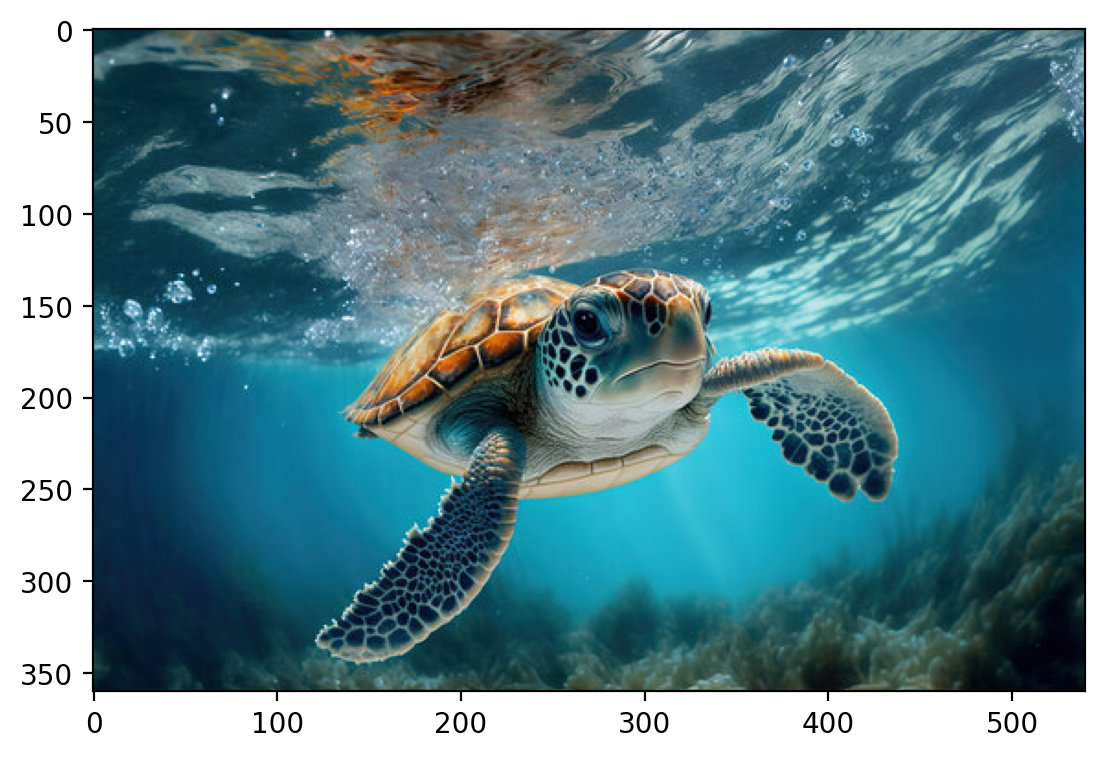

In [5]:
plt.imshow(rearrange(image,'c h w -> h w c').numpy())

In [6]:
image.dtype

torch.uint8

In [7]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(image.reshape(-1, 1))
scaler_img

MinMaxScaler()

In [8]:
scaled_image = scaler_img.transform(image.reshape(-1, 1)).reshape(image.shape)
scaled_image = torch.tensor(scaled_image)

In [9]:
scaled_image.shape

torch.Size([3, 360, 540])

In [10]:
scaled_image

tensor([[[0.0431, 0.0431, 0.0510,  ..., 0.2706, 0.2392, 0.2078],
         [0.0510, 0.0510, 0.0471,  ..., 0.2627, 0.2588, 0.2471],
         [0.0510, 0.0471, 0.0431,  ..., 0.3333, 0.3373, 0.3294],
         ...,
         [0.0314, 0.0235, 0.0157,  ..., 0.0196, 0.0275, 0.0314],
         [0.0235, 0.0235, 0.0196,  ..., 0.0000, 0.0039, 0.0118],
         [0.0314, 0.0275, 0.0275,  ..., 0.0471, 0.0510, 0.0549]],

        [[0.2078, 0.2078, 0.2078,  ..., 0.4353, 0.4039, 0.3569],
         [0.2157, 0.2157, 0.2118,  ..., 0.4118, 0.4078, 0.3882],
         [0.2157, 0.2118, 0.2078,  ..., 0.4784, 0.4784, 0.4706],
         ...,
         [0.1059, 0.0980, 0.0824,  ..., 0.0549, 0.0627, 0.0706],
         [0.0980, 0.0902, 0.0824,  ..., 0.0275, 0.0314, 0.0392],
         [0.1059, 0.1020, 0.0941,  ..., 0.0667, 0.0706, 0.0745]],

        [[0.2549, 0.2549, 0.2549,  ..., 0.4980, 0.4667, 0.4314],
         [0.2627, 0.2627, 0.2588,  ..., 0.4627, 0.4588, 0.4510],
         [0.2627, 0.2588, 0.2549,  ..., 0.5137, 0.5255, 0.

In [11]:
cropped_img=torchvision.transforms.functional.crop(scaled_image,100,150,250,250)

In [12]:
cropped_img.shape

torch.Size([3, 250, 250])

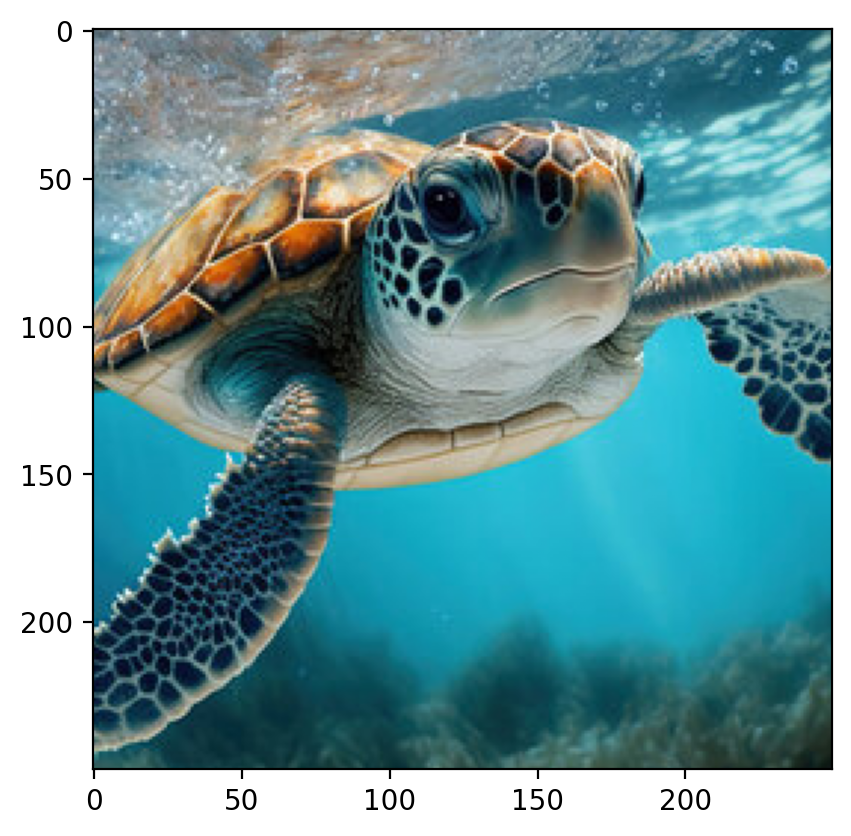

In [13]:
plt.imshow(rearrange(cropped_img, 'c h w -> h w c').numpy())

In [14]:
cropped_img

tensor([[[0.3451, 0.3686, 0.4196,  ..., 0.2196, 0.2706, 0.2980],
         [0.3333, 0.3216, 0.2980,  ..., 0.3176, 0.3451, 0.3255],
         [0.3647, 0.3529, 0.2902,  ..., 0.4627, 0.4784, 0.4392],
         ...,
         [0.2039, 0.1725, 0.1647,  ..., 0.0627, 0.0510, 0.0431],
         [0.1843, 0.2000, 0.1882,  ..., 0.0471, 0.0510, 0.0510],
         [0.2000, 0.1882, 0.1961,  ..., 0.0549, 0.0588, 0.0667]],

        [[0.4157, 0.4392, 0.4706,  ..., 0.4314, 0.4824, 0.5020],
         [0.4118, 0.4000, 0.3647,  ..., 0.5176, 0.5373, 0.5216],
         [0.4510, 0.4392, 0.3804,  ..., 0.6588, 0.6588, 0.6157],
         ...,
         [0.3961, 0.3569, 0.3569,  ..., 0.1137, 0.1020, 0.0863],
         [0.3412, 0.3569, 0.3608,  ..., 0.0980, 0.0941, 0.0863],
         [0.3922, 0.3882, 0.3608,  ..., 0.0902, 0.0941, 0.0863]],

        [[0.4549, 0.4784, 0.4941,  ..., 0.4784, 0.5216, 0.5451],
         [0.4549, 0.4431, 0.3961,  ..., 0.5333, 0.5529, 0.5255],
         [0.4941, 0.4824, 0.4118,  ..., 0.6471, 0.6471, 0.

In [15]:
def coordinate_mapping(image):

    num_of_channels,ht,wd=image.shape
    h_coordinate=torch.arange(ht).repeat(wd,1).t()
    w_coordinate=torch.arange(wd).repeat(ht,1)
    h_coordinate=h_coordinate.reshape(-1)
    w_coordinate=w_coordinate.reshape(-1)
    X = torch.stack([h_coordinate, w_coordinate], dim=1).float()
    y = rearrange(image, 'c h w -> (h w) c').float()

    return X, y

In [16]:
X,y=coordinate_mapping(cropped_img)
print(X.shape,X,'\n')
print(y.shape,y,'\n')

torch.Size([62500, 2]) tensor([[  0.,   0.],
        [  0.,   1.],
        [  0.,   2.],
        ...,
        [249., 247.],
        [249., 248.],
        [249., 249.]]) 

torch.Size([62500, 3]) tensor([[0.3451, 0.4157, 0.4549],
        [0.3686, 0.4392, 0.4784],
        [0.4196, 0.4706, 0.4941],
        ...,
        [0.0549, 0.0902, 0.0784],
        [0.0588, 0.0941, 0.0902],
        [0.0667, 0.0863, 0.0980]]) 



In [17]:
X_scaler=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(X)
X_scaled = X_scaler.transform(X)
X_scaled=torch.tensor(X_scaled)
X_scaled=X_scaled.float()

In [18]:
X_scaled.dtype

torch.float32

In [19]:
def get_rff(X,n,sigma):
    param=1/(2*sigma**2)
    from sklearn.kernel_approximation import RBFSampler
    rff=RBFSampler(n_components=n,gamma=param,random_state=42)
    X=X.numpy()
    X=rff.fit_transform(X)
    return torch.tensor(X,dtype=torch.float32)


In [20]:
X_rff=get_rff(X_scaled,40000,0.007)

In [21]:
X_rff.shape

torch.Size([62500, 40000])

In [22]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, X):
        return self.linear(X)

In [23]:
lin_model=LinearModel(X_rff.shape[1],3)

In [24]:
def train(model, X, y, E, alpha, verbose=True):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=alpha)
    for e in range(E):
        optimizer.zero_grad()
        outputs=model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if verbose and e%100 == 0:
            print(f"Epoch {e} loss: {loss.item():.6f}")
    return loss.item()

In [25]:
train(lin_model,X_rff,y,2500,0.009)

Epoch 0 loss: 0.251549
Epoch 100 loss: 0.018758
Epoch 200 loss: 0.010508
Epoch 300 loss: 0.006459
Epoch 400 loss: 0.004182
Epoch 500 loss: 0.002856
Epoch 600 loss: 0.002075
Epoch 700 loss: 0.001616
Epoch 800 loss: 0.001350
Epoch 900 loss: 0.001200
Epoch 1000 loss: 0.001116
Epoch 1100 loss: 0.001072
Epoch 1200 loss: 0.001048
Epoch 1300 loss: 0.001035
Epoch 1400 loss: 0.001028
Epoch 1500 loss: 0.001024
Epoch 1600 loss: 0.001021
Epoch 1700 loss: 0.001019
Epoch 1800 loss: 0.001017
Epoch 1900 loss: 0.001016
Epoch 2000 loss: 0.001015
Epoch 2100 loss: 0.001013
Epoch 2200 loss: 0.001012
Epoch 2300 loss: 0.001011
Epoch 2400 loss: 0.001010


0.001009500352665782

In [26]:
with torch.no_grad():
    y_pred = lin_model(X_rff)

n, ht, wd=cropped_img.shape

y_pred=y_pred.reshape(ht, wd, n)

y_true=cropped_img.permute(1,2,0)


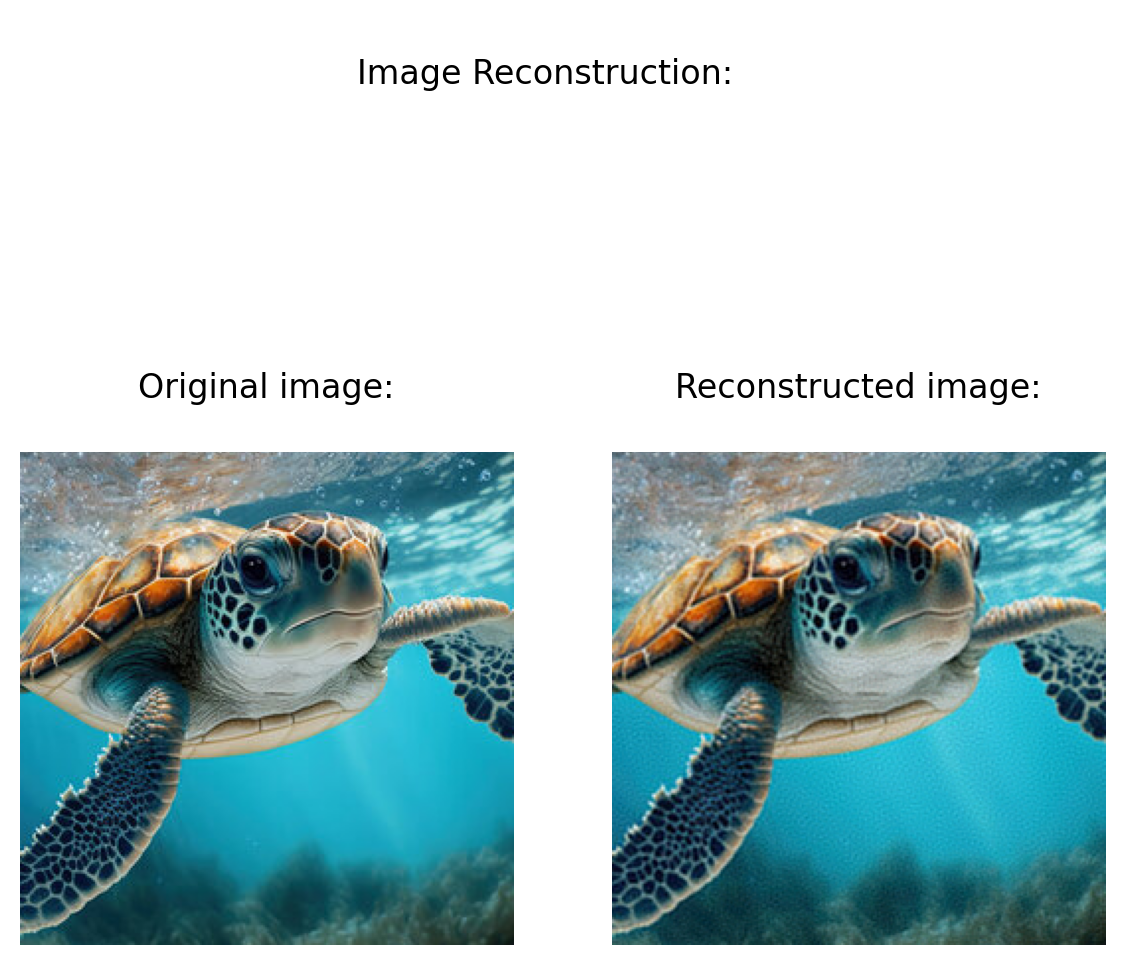

In [27]:
plt.figure(figsize=(7,7))
plt.suptitle('\nImage Reconstruction:')
plt.subplot(1,2,1)
plt.title('Original image:\n')
plt.imshow(y_true)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(y_pred)
plt.title('Reconstructed image:\n')
plt.axis('off')
plt.show()

In [28]:
MSE=nn.MSELoss()
mse=MSE(y_true,y_pred)

In [29]:
rmse=torch.sqrt(mse)

In [30]:
MAX_px=1 # we have standardized pixels from 0 to 1

In [31]:
psnr=10*torch.log10(MAX_px**2/mse)

In [32]:
print(f'RMSE : {rmse}\n PSNR: {psnr}')

RMSE : 0.03177250147711082
 PSNR: 29.958971828770885
